# import all necessary Python modules

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image, display
import sklearn.preprocessing as preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle
import itertools
from scipy import signal
import matplotlib as mpl
import umap
import hdbscan
import pingouin as pg
from sklearn.preprocessing import StandardScaler
unique_user_path_notebook = str(np.load('unique_user_path_notebook.npy'))
unique_user_saved_outputs = str(np.load('unique_user_saved_outputs.npy'))
unique_user_path_tracks = str(np.load('unique_user_path_tracks.npy'))
sys.path.append(unique_user_path_notebook+'/cmeAnalysisPostProcessingPythonScripts') # add custom Python scripts to the local path
import display_tracks
import merge_tools
import return_track_attributes
import generate_index_dictionary
import feature_extraction_with_buffer

/Users/cynashirazinejad/opt/anaconda3/envs/threesix/lib/python3.6/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [2]:
possible_track_features = np.load(unique_user_saved_outputs+'/dataframes/possible_track_features.npy')
best_fit_peak_params = np.load(unique_user_saved_outputs+'/dataframes/parameters_best_fit_peak_finding.npy')
index_DNM2positive = np.load(unique_user_saved_outputs+'/dataframes/cluster_dnm2_positive.npy')
index_dictionary = generate_index_dictionary.return_index_dictionary()

The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.


# upload 3 color data for ap2/dnm2/arpc3

In [4]:
# upload all 3 channels
all_tracks = [] # a list of all the track objects; each value is one experiment

# this cell is for the following experiment set: 200804_ADA3
tracks_200804ADA3Cell001_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_ADA3/split_channel_data/200804_ADA3_001/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADA3Cell001AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200804ADA3Cell002_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_ADA3/split_channel_data/200804_ADA3_002/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADA3Cell002AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200804ADA3Cell003_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_ADA3/split_channel_data/200804_ADA3_003/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADA3Cell003AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200804ADA3Cell008_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_ADA3/split_channel_data/200804_ADA3_008/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADA3Cell008AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200804ADA3Cell009_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_ADA3/split_channel_data/200804_ADA3_009/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADA3Cell009AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')

all_tracks.append(tracks_200804ADA3Cell001_1s)
all_tracks.append(tracks_200804ADA3Cell002_1s)
all_tracks.append(tracks_200804ADA3Cell003_1s)
all_tracks.append(tracks_200804ADA3Cell008_1s)
all_tracks.append(tracks_200804ADA3Cell009_1s)

# this cell is for the following experiment set: 200819_ADA3
tracks_200819ADA3Cell001_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200819_ADA3/split_channel_data/200819_ADA3_001/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200819ADA3Cell001AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200819ADA3Cell002_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200819_ADA3/split_channel_data/200819_ADA3_002/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200819ADA3Cell002AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200819ADA3Cell003_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200819_ADA3/split_channel_data/200819_ADA3_003/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200819ADA3Cell003AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')

all_tracks.append(tracks_200819ADA3Cell001_1s)
all_tracks.append(tracks_200819ADA3Cell002_1s)
all_tracks.append(tracks_200819ADA3Cell003_1s)

# # using previous imaging data (7/22) that did not have AP2/DNM2 cell line imaged at the same time

tracks_200722ADCell001_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200722_ADA3/split_channel_data/200722_ADA3_001/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200722ADA3Cell001AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200722ADCell002_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200722_ADA3/split_channel_data/200722_ADA3_002/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200722ADA3Cell002AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200722ADCell003_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200722_ADA3/split_channel_data/200722_ADA3_003/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200722ADA3Cell003AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200722ADCell004_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200722_ADA3/split_channel_data/200722_ADA3_004/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200722ADA3Cell004AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200722ADCell005_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200722_ADA3/split_channel_data/200722_ADA3_005/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200722ADA3Cell005AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')

all_tracks.append(tracks_200722ADCell001_1s)
all_tracks.append(tracks_200722ADCell002_1s)
all_tracks.append(tracks_200722ADCell003_1s)
all_tracks.append(tracks_200722ADCell004_1s)
all_tracks.append(tracks_200722ADCell005_1s)

In [5]:
valid_tracks_separate_experiments_3_color = [display_tracks.remove_tracks_by_criteria(track_set, track_category=[1]) for track_set in all_tracks]

The number of tracks returned: 6246

The number of tracks returned: 7601

The number of tracks returned: 8386

The number of tracks returned: 7435

The number of tracks returned: 7712

The number of tracks returned: 7898

The number of tracks returned: 6650

The number of tracks returned: 6620

The number of tracks returned: 7647

The number of tracks returned: 7693

The number of tracks returned: 7411

The number of tracks returned: 7348

The number of tracks returned: 6256



In [7]:
merged_all_valid_tracks = merge_tools.merge_experiments(valid_tracks_separate_experiments_3_color,[list(range(len(track_set))) for track_set in valid_tracks_separate_experiments_3_color])

# save all valid tracks, split to allow for <100 mb permitted size

In [8]:
# save each track array chunk
for i in range(len(valid_tracks_separate_experiments_3_color)):

    np.save(unique_user_saved_outputs+"/dataframes/merged_all_valid_tracks_3colorsimultaneoustrackingarpc3"+str(i), np.array(list(valid_tracks_separate_experiments_3_color[i])))

# load all valid tracks

In [3]:
# load all valid tracks
merged_all_valid_tracks = np.load(unique_user_saved_outputs+'/dataframes/merged_all_valid_tracks_3colorsimultaneoustrackingarpc30.npy', allow_pickle=True)
valid_tracks_separate_experiments_3_color = []
valid_tracks_separate_experiments_3_color.append(merged_all_valid_tracks)

for i in range(1,13):

    merged_all_valid_tracks = np.concatenate((merged_all_valid_tracks,
                                             np.load(unique_user_saved_outputs+'/dataframes/merged_all_valid_tracks_3colorsimultaneoustrackingarpc3'+str(i)+'.npy', allow_pickle=True)))
    valid_tracks_separate_experiments_3_color.append(np.load(unique_user_saved_outputs+'/dataframes/merged_all_valid_tracks_3colorsimultaneoustrackingarpc3'+str(i)+'.npy', allow_pickle=True))

In [4]:
experiment_number = [i for i in range(len(valid_tracks_separate_experiments_3_color)) for _ in range(len(valid_tracks_separate_experiments_3_color[i]))]

# extract features and find DNM2+ and events_kept

In [5]:
possible_track_features

array(['lifetime', 'max_int_ch0', 'max_int_ch1', 'dist_traveled_ch0',
       'dist_traveled_ch1', 'max_dist_between_ch0_ch1', 'md_ch0',
       'md_ch1', 'time_to_peak_ch0', 'time_to_peak_ch1',
       'time_after_peak_ch0', 'time_after_peak_ch1',
       'time_between_peaks_ch0_ch1', 'avg_int_change_to_peak_ch0',
       'avg_int_change_to_peak_ch1', 'avg_int_change_after_peak_ch0',
       'avg_int_change_after_peak_ch1', 'peak_int_diff_ch0_ch1',
       'ratio_max_int_ch0_ch1', 'mean_ch0', 'mean_ch1', 'variation_ch0',
       'variation_ch1', 'skewness_ch0', 'skewness_ch1', 'kurtosis_ch0',
       'kurtosis_ch1', 'number_significant_ch1',
       'max_consecutive_significant_ch1', 'fraction_significant_ch1',
       'fraction_peak_ch0', 'fraction_peak_ch1'], dtype='<U31')

In [6]:
all_track_features_3_color = feature_extraction_with_buffer.TrackFeatures(merged_all_valid_tracks) # an instance of a to-be feature matrix of tracks
all_track_features_3_color.add_features(possible_track_features) # set the features to be extracted
all_track_features_3_color.extract_features() # extract all features
extracted_features_all_tracks_3_color = all_track_features_3_color.feature_matrix # feature matrix for all tracks

In [7]:
df_merged_features_simultaneous3colortrackingarpc3 = pd.DataFrame(data=extracted_features_all_tracks_3_color, columns=possible_track_features)

In [8]:
# save the dataframe for subsequent notebooks
compression_opts = dict(method='zip',
                        archive_name=unique_user_saved_outputs+'/dataframes/df_merged_features_simultaneous3colortrackingarpc3.csv')  

df_merged_features_simultaneous3colortrackingarpc3.to_csv(unique_user_saved_outputs+'/dataframes/df_merged_features_simultaneous3colortrackingarpc3.zip', index=False,
                                                          compression=compression_opts) 

In [9]:
with open(unique_user_saved_outputs+'/dataframes/normal_scaler_model', 'rb') as f:
    scaler = pickle.load(f)

with open(unique_user_saved_outputs+'/dataframes/pca_model_fit', 'rb') as f:
    pca_model = pickle.load(f)

with open(unique_user_saved_outputs+'/dataframes/gmm_trained', 'rb') as f:
    gmm_model = pickle.load(f)

In [10]:
scaled_features_new_data = scaler.transform(extracted_features_all_tracks_3_color[:,:len(possible_track_features)]) # scale features to normal distribution, taking into account all previously scaled data
pcs_new_data = pca_model.transform(scaled_features_new_data) # find projections of newly scaled data on previous PC axes
gmm_predictions_new_data = gmm_model.predict(pcs_new_data) # find gmm cluster assignments using previously fit model

In [11]:
# get DNM2 positive events
dnm2_pos_indices = np.where(gmm_predictions_new_data==index_DNM2positive)[0]
dnm2_positive_events = np.array(list(merged_all_valid_tracks))[dnm2_pos_indices]

In [12]:
all_dnm2_signal = []

for i in range(len(dnm2_positive_events)): # stack all DNM2 intensities

    raw_dnm2_intensity = list(return_track_attributes.return_track_amplitude_no_buffer_channel(dnm2_positive_events,i,1))

    all_dnm2_signal.append(raw_dnm2_intensity)

In [13]:
sos = signal.butter(4, 0.2, 'lp', fs=1, output='sos') # low-pass 4-th order Butterworth filter

filtered_amplitudes = [] # filtered DNM2 traces per track of interest

for i in range(len(all_dnm2_signal)):

    raw_intensity = all_dnm2_signal[i]
    # add zeros to end to account for phase shift of near-track-end peaks
    filtered_amplitudes.append(list(list(signal.sosfilt(sos, raw_intensity)) + [0, 0, 0, 0, 0])) 
    
current_param_outputs = [] # one-hot encoding of indices of tracks with a single peak (0: multiple peaks)


for i in range(len(filtered_amplitudes)): # iterate through all filtered amplitudes
    
    pvals_dnm2 = return_track_attributes.return_pvals_detection_no_buffer(dnm2_positive_events, i, 1)
    
    # measure whether there is 1 peak with the specified peak-finding parameters
    if len(signal.find_peaks(filtered_amplitudes[i], 
                             distance=best_fit_peak_params[0], 
                             height=best_fit_peak_params[1],
                             width=best_fit_peak_params[2])[0])==1 and len(np.where(np.array(pvals_dnm2)<0.01)[0])>0:

        current_param_outputs.append(1)

    else:

        current_param_outputs.append(0)

In [79]:
ccp_indices = np.where(np.array(current_param_outputs)==1)[0]
ccps = dnm2_positive_events[ccp_indices]

In [15]:
events_kept = ccps

In [55]:
ccp_features = extracted_features_all_tracks_3_color[dnm2_pos_indices][ccp_indices]

In [56]:
ccp_features.shape

(3293, 32)

# extract 3rd channel (ARPC3) features

In [16]:
lifetime = []
max_arpc3_intensity = []
max_dnm2_intensity = []
max_ap2_intensity = []
number_significant_arpc3 = []
max_consecutive_significant_arpc3 = []
fraction_significant_arpc3 = []
fraction_arpc3_peak = []
fraction_dnm2_peak = []
fraction_PSF = []
num_PSF = []
max_consecutive_PSF = []
num_non_PSF = []
max_consecutive_non_PSF = []
fraction_non_PSF = []
peak_diff_time_dnm2_arpc3 = []
arpc3_psf_status_dnm2_peak = []
arpc3_intensity_dnm2_peak = []
mean_ap2arpc3sep = []
ap2arpc3sep_dnm2_peak = []
final_ap2arpc3sep = []

for i in range(len(events_kept)):
    
    filtered_dnm2_signal = list(list(signal.sosfilt(sos, return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept, i, 1))) + [0, 0, 0, 0, 0])

    dnm2_peak = signal.find_peaks(filtered_dnm2_signal, 
                                  distance=best_fit_peak_params[0], 
                                  height=best_fit_peak_params[1],
                                  width=best_fit_peak_params[2])[0][0]
    
    ch0_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(events_kept, i, 0) # positions of ap2 and dnm2
    ch0_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(events_kept, i, 0)
    ch1_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(events_kept, i, 1)
    ch1_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(events_kept, i, 1)
    ch2_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(events_kept, i, 2)
    ch2_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(events_kept, i, 2)
    ap2dnm2sep = np.sqrt((0.108*(ch0_x-ch1_x))**2 + (0.108*(ch0_y-ch1_y))**2)
    ap2arpc3sep = np.sqrt((0.108*(ch0_x-ch2_x))**2 + (0.108*(ch0_y-ch2_y))**2)

    mean_ap2arpc3sep.append(np.nanmean(ap2arpc3sep))
    ap2arpc3sep_dnm2_peak.append(ap2arpc3sep[dnm2_peak])
    final_ap2arpc3sep.append(np.mean(ap2arpc3sep[-5:]))
    
    lifetime.append(return_track_attributes.return_track_lifetime(events_kept, i))
    
    max_arpc3_intensity.append(np.max(
        return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept, i, 2)))
    max_dnm2_intensity.append(np.max(
        return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept, i, 1)))
    max_ap2_intensity.append(np.max(
        return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept, i, 0)))
    
    pvals = return_track_attributes.return_pvals_detection_no_buffer(events_kept, i, 2)
    
    number_significant_arpc3.append(len(np.where(pvals<0.01)[0]))     
    
    significant_pval_indices = [1 if pval < 0.01 else 0 for pval in pvals]
    
    repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices)]
    
    max_1s = 0

    for itm in repeated_indices:
        if itm[0] == 1:
            if itm[1]>max_1s:
                max_1s=itm[1]
                
    max_consecutive_significant_arpc3.append(max_1s)
    
    fraction_significant_arpc3.append((pvals < 0.01).sum()/len(pvals))
    
    arpc3_intensity = return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept, i, 2)
    dnm2_intensity = return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept, i, 1)
    
    peak_diff_time_dnm2_arpc3.append(np.nanargmax(arpc3_intensity) - dnm2_peak)
    
    fraction_arpc3_peak.append(np.nanargmax(arpc3_intensity)/len(arpc3_intensity))
    fraction_dnm2_peak.append(dnm2_peak/len(dnm2_intensity))
    
    psf_status = events_kept[i][index_dictionary['index_isPSF']][2]
    
    if psf_status[dnm2_peak]==0 or psf_status[dnm2_peak]==1:
        
        arpc3_psf_status_dnm2_peak.append(psf_status[dnm2_peak])
    
    else:
        
        arpc3_psf_status_dnm2_peak.append(0)
    
    arpc3_intensity_dnm2_peak.append(arpc3_intensity[dnm2_peak])
    
    num_PSF.append(len(np.where(psf_status==1)[0]))     
    
    clustered_psf_indices = [1 if psf==1 else 0 for psf in psf_status]
    
    repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(clustered_psf_indices)]
    
    max_1s = 0

    for itm in repeated_indices:
        if itm[0] == 1:
            if itm[1]>max_1s:
                max_1s=itm[1]
                
    max_consecutive_PSF.append(max_1s)
    
    fraction_PSF.append((psf_status==1).sum()/len(psf_status))    
    
    num_non_PSF.append(len(np.where(psf_status==0)[0]))     
    
    clustered_non_psf_indices = [1 if psf==0 else 0 for psf in psf_status]
    
    repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(clustered_non_psf_indices)]
    
    max_1s = 0

    for itm in repeated_indices:
        if itm[0] == 1:
            if itm[1]>max_1s:
                max_1s=itm[1]
                
    max_consecutive_non_PSF.append(max_1s)
    
    fraction_non_PSF.append((psf_status==0).sum()/len(psf_status))        
    

In [17]:
column_labels = ['lifetime',
               'max_arpc3_intensity',
               'max_dnm2_intensity',
               'max_ap2_intensity',
               'number_arpc3_significant',
               'max_consecutive_arpc3_significant',
               'fraction_arpc3_significant',
               'fraction_arpc3_peak',
               'fraction_dnm2_peak',
               'num_arpc3_PSF',
               'max_consecutive_arpc3_PSF',
               'fraction_arpc3_PSF',
               'num_arpc3_non_PSF',
               'max_consecutive_arpc3_non_PSF',
               'fraction_arpc3_non_PSF',
               'peak_time_difference_dnm2_arpc3',
               'arpc3_psf_status_dnm2_peak',
               'arpc3_intensity_dnm2_peak',
               'mean_ap2arpc3sep',
               'ap2arpc3sep_dnm2_peak',
               'final_ap2arpc3sep']

In [18]:
feature_units = ['seconds',
                 'a.u. fluorescence', 
                 'a.u. fluorescence',
                 'a.u. fluorescence',
                 'counts',
                 'counts',
                 'unitless',
                 'unitless',
                 'unitless',
                 'counts',
                 'counts',
                 'unitless',
                 'counts',
                 'counts',
                 'unitless',
                 'seconds',
                 'binary', 
                 'a.u. fluorescence',
                 'microns',
                 'microns',
                 'microns']

In [19]:
merged_features = [lifetime,
                   max_arpc3_intensity, 
                   max_dnm2_intensity,
                   max_ap2_intensity,
                   number_significant_arpc3, 
                   max_consecutive_significant_arpc3, 
                   fraction_significant_arpc3,
                   fraction_arpc3_peak,
                   fraction_dnm2_peak,
                   num_PSF,
                   max_consecutive_PSF,
                   fraction_PSF,
                   num_non_PSF,
                   max_consecutive_non_PSF,
                   fraction_non_PSF,
                   peak_diff_time_dnm2_arpc3,
                   arpc3_psf_status_dnm2_peak,
                   arpc3_intensity_dnm2_peak,
                   mean_ap2arpc3sep,
                   ap2arpc3sep_dnm2_peak,
                   final_ap2arpc3sep]

merged_features = np.array(merged_features).T
df_arpc3_features_clustering = pd.DataFrame(data=merged_features, columns=column_labels)

In [20]:
scaled_arpc3features = preprocessing.QuantileTransformer(output_distribution='normal', random_state=817).fit_transform(df_arpc3_features_clustering.values)

In [21]:
%%capture
plt.figure(dpi=500)

pc_model = PCA(n_components=2, random_state=817)

reduced_data = pc_model.fit_transform(scaled_arpc3features)

plt.hist2d(reduced_data[:,0], reduced_data[:,1], bins=50)
plt.xlabel('PC-0')
plt.ylabel('PC-1')
plt.savefig(unique_user_saved_outputs+'/plots/pcproj_arpc3features_scaled.png')

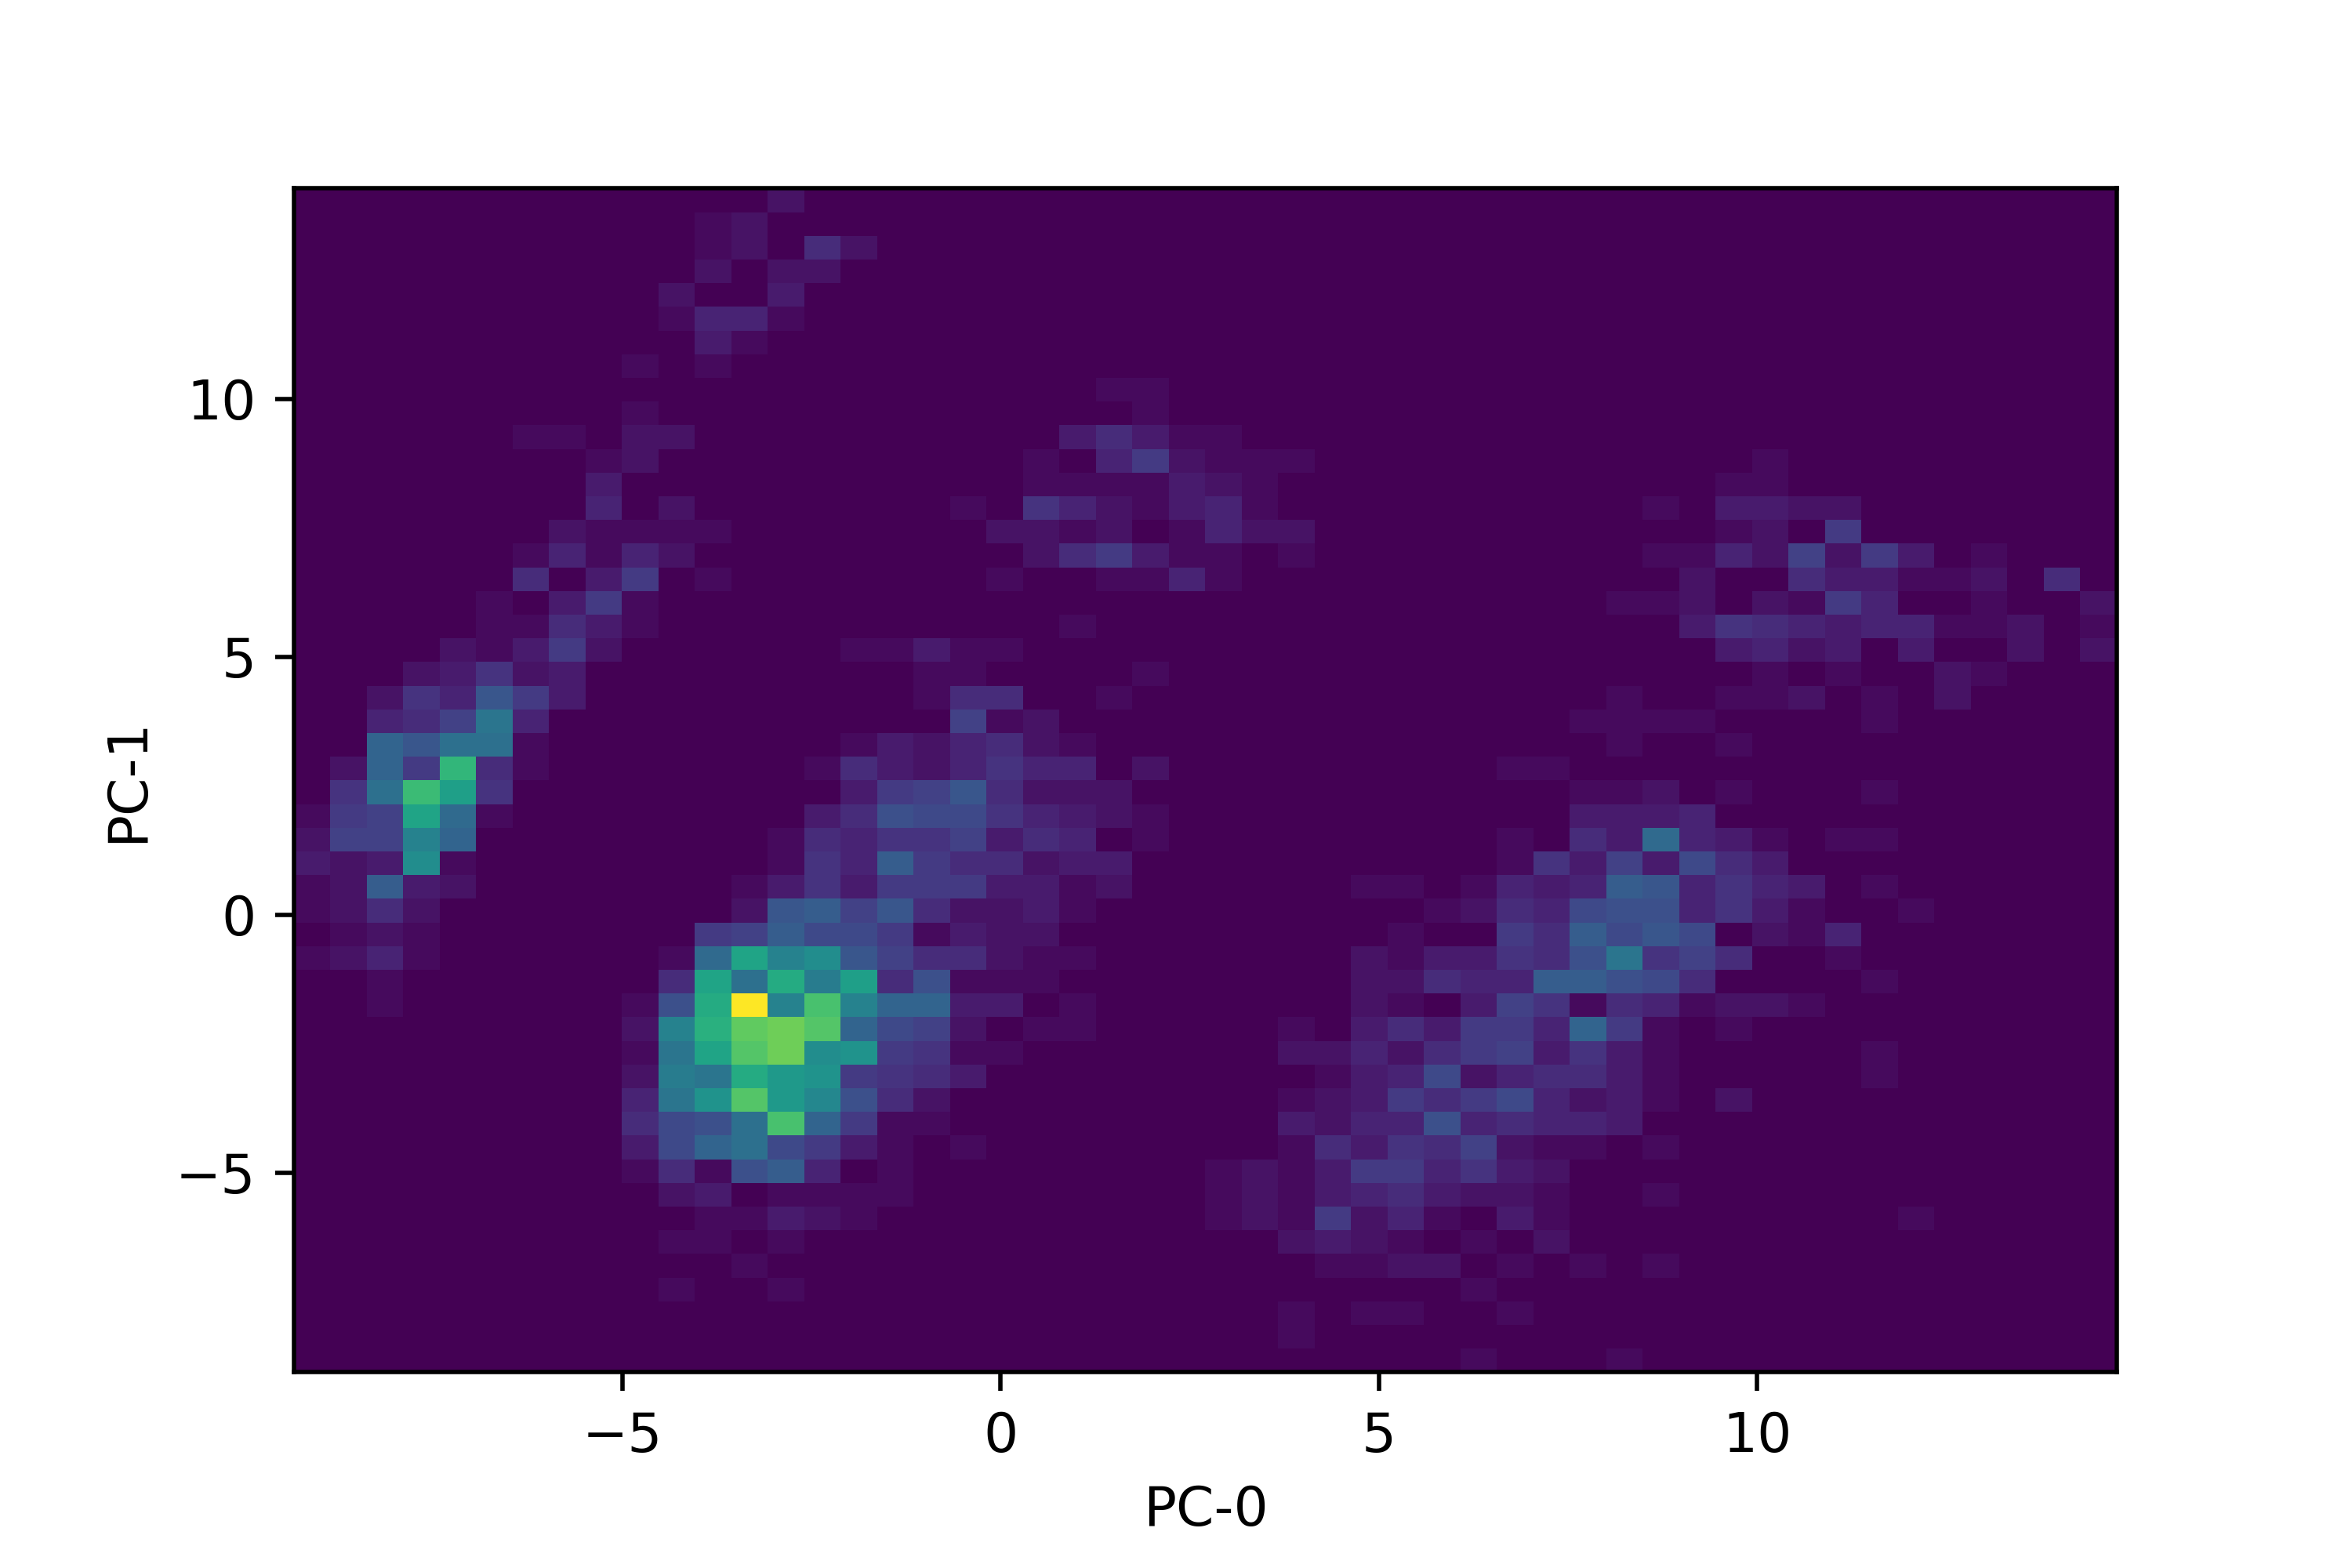

In [22]:
Image(filename=unique_user_saved_outputs+'/plots/pcproj_arpc3features_scaled.png', height=500, width=500)

In [23]:
labels_pca = hdbscan.HDBSCAN(
    min_samples=9,
    min_cluster_size=50,
).fit_predict(reduced_data)

In [24]:
for cluster in list(set(labels_pca)):

    print('cluster {} contains {}% of all members'.format(cluster, len(np.where(labels_pca==cluster)[0])/len(labels_pca)*100))

cluster 0 contains 17.734588521105373% of all members
cluster 1 contains 3.310051624658366% of all members
cluster 2 contains 49.377467354995446% of all members
cluster 3 contains 4.8891588217430915% of all members
cluster 4 contains 23.74734284846644% of all members
cluster -1 contains 0.9413908290312785% of all members


In [53]:
len(labels_pca)

3293

In [54]:
from sklearn.neighbors import KDTree

In [57]:
tree_ccps_simultaneous = KDTree(ccp_features)     

In [106]:
ccps_arpc3_negative_sep = np.load(unique_user_saved_outputs+'/dataframes/ccps_arpc3_negative_zeropadding.npy', allow_pickle=True)
ccps_arpc3_positive_sep = np.load(unique_user_saved_outputs+'/dataframes/ccps_arpc3_positive_zeropadding.npy', allow_pickle=True)

In [107]:
arp_status_sep_linking = [0 for i in range(len(ccps_arpc3_negative_sep))] + [1 for i in range(len(ccps_arpc3_positive_sep))]

In [108]:
ccps_merged_sep = list(ccps_arpc3_negative_sep) + list(ccps_arpc3_positive_sep)

In [109]:
len(ccps_merged_sep), len(arp_status_sep_linking)

(2831, 2831)

In [110]:
ccps_arpc3_positive_sep = feature_extraction_with_buffer.TrackFeatures(ccps_arpc3_positive_sep) # an instance of a to-be feature matrix of tracks
ccps_arpc3_positive_sep.add_features(possible_track_features) # set the features to be extracted
ccps_arpc3_positive_sep.extract_features() # extract all features
features_ccps_arpc3_positive_sep = ccps_arpc3_positive_sep.feature_matrix # feature matrix for all tracks

In [111]:
ccps_arpc3_negative_sep = feature_extraction_with_buffer.TrackFeatures(ccps_arpc3_negative_sep) # an instance of a to-be feature matrix of tracks
ccps_arpc3_negative_sep.add_features(possible_track_features) # set the features to be extracted
ccps_arpc3_negative_sep.extract_features() # extract all features
features_ccps_arpc3_negative_sep = ccps_arpc3_negative_sep.feature_matrix # feature matrix for all tracks

In [99]:
distances_tree = []
cluster_nearest_neighbor = []

for i in range(features_ccps_arpc3_positive_sep.shape[0]):
    
    dist, ind = tree_ccps_simultaneous.query(features_ccps_arpc3_positive_sep[i,:].reshape(1, -1))
#     print(ind)
    distances_tree.append(dist[0][0])
    cluster_nearest_neighbor.append(labels_pca[ind[0][0]])

(array([1.987e+03, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.        ,  11.91353705,  23.82707409,  35.74061114,
         47.65414819,  59.56768524,  71.48122228,  83.39475933,
         95.30829638, 107.22183343, 119.13537047]),
 <a list of 10 Patch objects>)

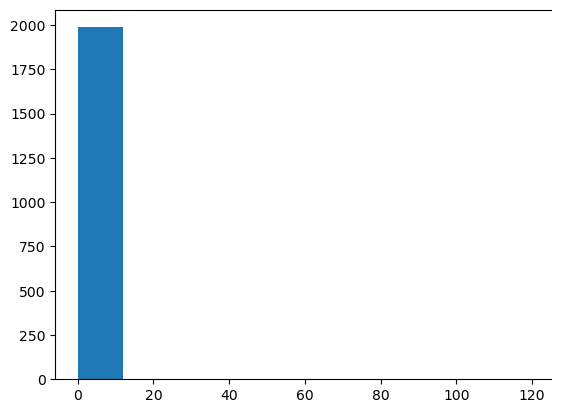

In [101]:
plt.hist(distances_tree)

(array([  10.,    0.,  394.,    0.,   14.,    0., 1135.,    0.,   26.,
         412.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <a list of 10 Patch objects>)

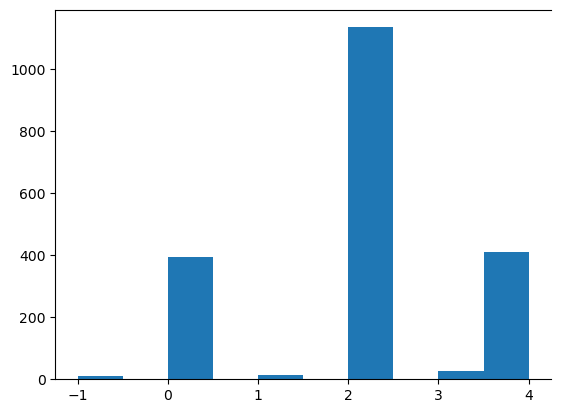

In [100]:
plt.hist(cluster_nearest_neighbor)

In [112]:
distances_tree = []
cluster_nearest_neighbor = []

for i in range(features_ccps_arpc3_negative_sep.shape[0]):
    
    dist, ind = tree_ccps_simultaneous.query(features_ccps_arpc3_negative_sep[i,:].reshape(1, -1))
#     print(ind)
    distances_tree.append(dist[0][0])
    cluster_nearest_neighbor.append(labels_pca[ind[0][0]])

(array([837.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0.        ,  7.03044931, 14.06089862, 21.09134794, 28.12179725,
        35.15224656, 42.18269587, 49.21314518, 56.24359449, 63.27404381,
        70.30449312]),
 <a list of 10 Patch objects>)

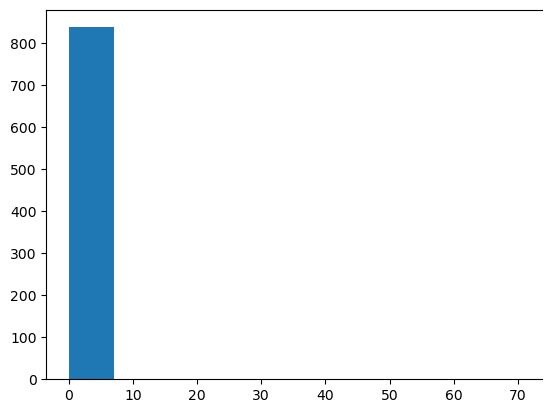

In [113]:
plt.hist(distances_tree)

(array([ 18.,   0., 103.,   0.,  88.,   0., 275.,   0., 124., 232.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <a list of 10 Patch objects>)

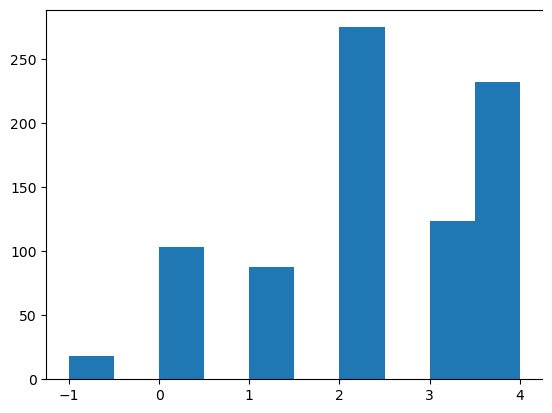

In [114]:
plt.hist(cluster_nearest_neighbor)

In [25]:
df_arpc3_features_clustering['cluster'] = labels_pca

In [26]:
# save the dataframe for subsequent notebooks
compression_opts = dict(method='zip',
                        archive_name=unique_user_saved_outputs+'/dataframes/df_arpc3_features_clustering.csv')  

df_arpc3_features_clustering.to_csv(unique_user_saved_outputs+'/dataframes/df_arpc3_features_clustering.zip', index=False,
                                                          compression=compression_opts) 

In [27]:
df_arpc3_features_clustering = pd.read_csv(unique_user_saved_outputs+'/dataframes/df_arpc3_features_clustering.zip')

# pca label feature distributions

In [28]:
%%capture

labels=labels_pca
plt.style.use('default')
df_features = df_arpc3_features_clustering
num_columns = 5
num_rows = int(np.ceil(len(column_labels)/num_columns)+1)

plot_position = 1 

f = plt.figure(dpi=500, figsize=(30,30))

for i in range(len(column_labels)):

    ax = f.add_subplot(num_rows, num_columns, plot_position)
    plot_position+=1
    
    all_feature_values = df_features[df_features.columns[i]].values
    
    for cluster_num in np.setdiff1d(labels, -1):
        
        cluster_features_indices = np.where(labels==cluster_num)[0]
        cluster_features = df_features[df_features.columns[i]].values[cluster_features_indices]
        ax.hist(cluster_features, label=cluster_num, bins='auto', density=True, histtype='step', cumulative=True)

    ax.set_xlabel(df_features.columns[i]+' ('+column_labels[i]+')',fontsize=5)
    ax.set_ylabel('cumulative frequency',fontsize=5)
    ax.set_xlim([np.max((np.min(all_feature_values),np.min(all_feature_values))),
                 np.min((np.max(all_feature_values),np.max(all_feature_values)))])
    ax.tick_params(axis='both', which='major', labelsize=3)
    ax.tick_params(axis='both', which='minor', labelsize=3)
    plt.legend(loc='best')
    plt.grid()
    
plt.savefig(unique_user_saved_outputs+'/plots/all_features_compared_between_classes_arpc3_clustering.png', bbox_inches='tight')

In [29]:
Image(filename=unique_user_saved_outputs+'/plots/all_features_compared_between_classes_arpc3_clustering.png', height=500, width=500)

In [30]:
class MidpointNormalize(mpl.colors.Normalize): # https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))

# feature importance

In [31]:
%%capture

plt.style.use('default')
plt.rcParams['figure.figsize']=(3,2)
plt.rcParams['figure.dpi']=100
fig, ax = plt.subplots(1,1, constrained_layout=False, figsize=(10,10))
columns=column_labels
data = scaled_arpc3features
pc_model = PCA(n_components=5, random_state=817)
reduced_data = pc_model.fit_transform(data)

vmin = -1
vmax = 1
norm = MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=0)
cmap = 'bwr'

array_plot = pc_model.components_.T
im = ax.imshow(array_plot,
                interpolation='none', aspect=0.3, origin='upper', cmap=cmap, norm=norm)
# Major ticks
ax.set_xticks(np.arange(0, 2, 1))
ax.set_yticks(np.arange(0, len(columns), 1))

# Labels for major ticks
ax.set_xticklabels(['PC-0', 'PC-1'])
ax.set_yticklabels(df_features.columns[:len(columns)].values)


# Minor ticks
ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-.5, len(columns), 1), minor=True)


ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
cba = fig.colorbar(im, shrink=1)
cba.set_label('absolute value of component in feature space', rotation=270, labelpad=15)
cax = cba.ax
pos = cax.get_position()
pos_new = [pos.x0-1, pos.y0, pos.width, pos.height]
cax.set_position(pos_new)
for (j,i),label in np.ndenumerate(array_plot):
    ax.text(i,j,str(np.around(label,3)),ha='center',va='center')

plt.title('magnitude of principal \ncomponent vector along feature space')
plt.tight_layout()

plt.savefig(unique_user_saved_outputs+'/plots/PC_heatmap_arpc3features.png')

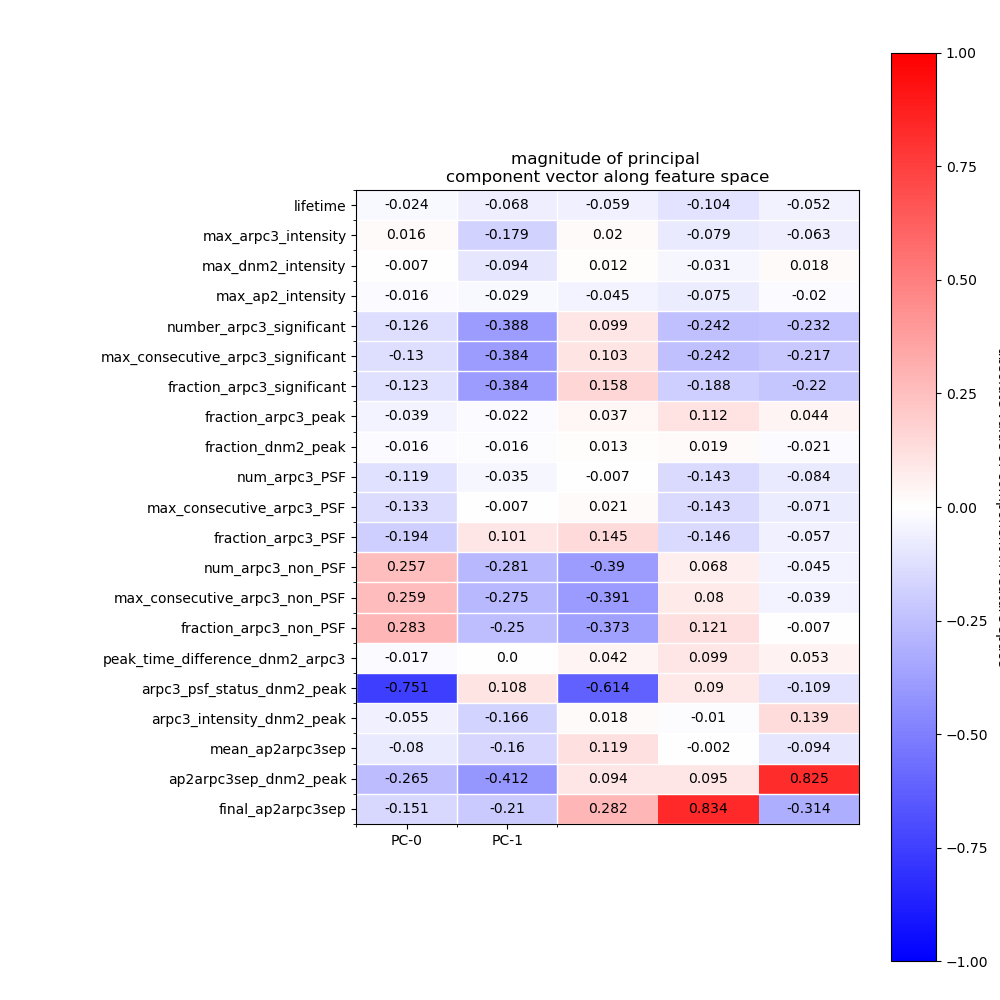

In [32]:
Image(filename=unique_user_saved_outputs+'/plots/PC_heatmap_arpc3features.png', height=500, width=500)

In [33]:
%%capture

plt.style.use('default')

plt.rcParams['figure.figsize']=(3,2)
plt.rcParams['figure.dpi']=500
fig, ax = plt.subplots(1,1, constrained_layout=False, figsize=(10,10))

data = scaled_arpc3features
pc_model = PCA(n_components=5, random_state=817)
reduced_data = pc_model.fit_transform(data)

vmin = 0
vmax = 1
norm = MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=0.4)
cmap = 'YlGnBu'

array_plot = np.abs(pc_model.components_.T)
im = ax.imshow(array_plot,
                interpolation='none', aspect=0.3, origin='upper', norm=norm, cmap=cmap)
# Major ticks
ax.set_xticks(np.arange(0, 2, 1))
ax.set_yticks(np.arange(0, len(columns), 1))

# Labels for major ticks
ax.set_xticklabels(['PC-0', 'PC-1'])
ax.set_yticklabels(df_features.columns[:len(columns)].values)


# Minor ticks
ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-.5, len(columns), 1), minor=True)


ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
cba = fig.colorbar(im, shrink=1)
cba.set_label('absolute value of component in feature space', rotation=270, labelpad=15)
cax = cba.ax
pos = cax.get_position()
pos_new = [pos.x0-1, pos.y0, pos.width, pos.height]
cax.set_position(pos_new)
for (j,i),label in np.ndenumerate(array_plot):
    ax.text(i,j,str(np.around(label,3)),ha='center',va='center')

plt.title('magnitude of principal \ncomponent vector along feature space')
plt.tight_layout()

plt.savefig(unique_user_saved_outputs+'/plots/PC_heatmap_abs_arpc3features.png')

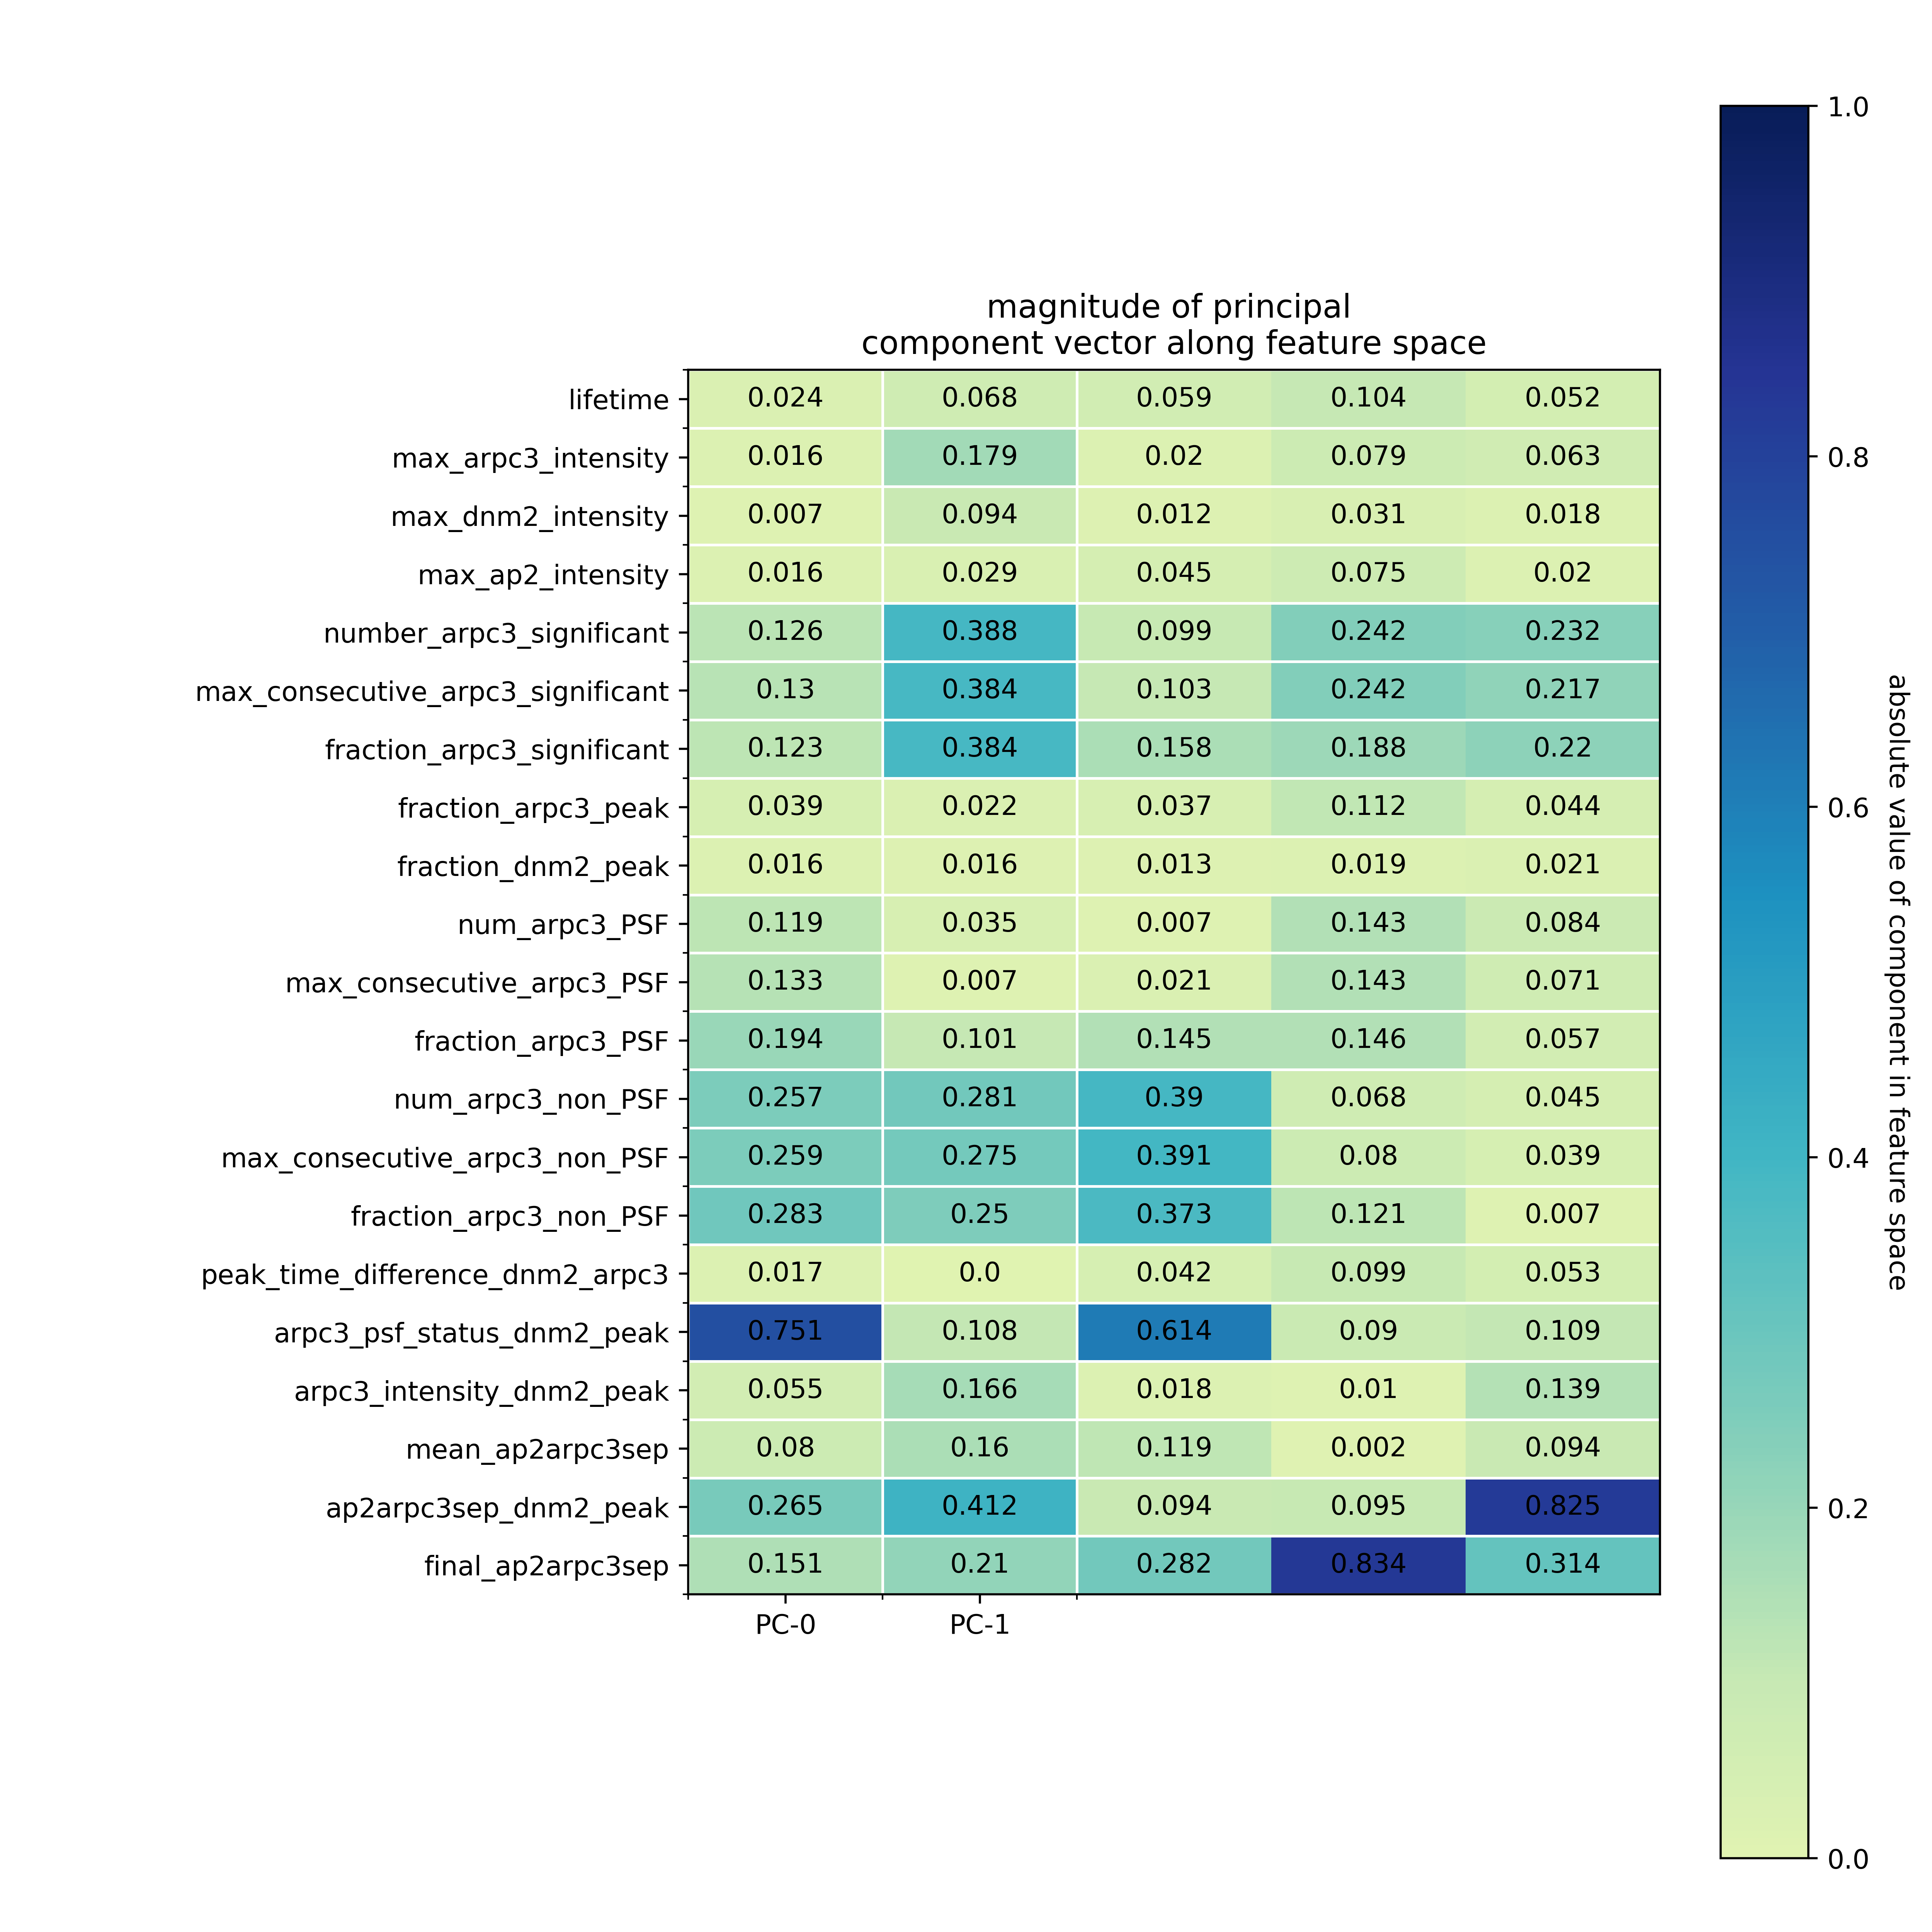

In [34]:
Image(filename=unique_user_saved_outputs+'/plots/PC_heatmap_abs_arpc3features.png', height=500, width=500)

# align tracks

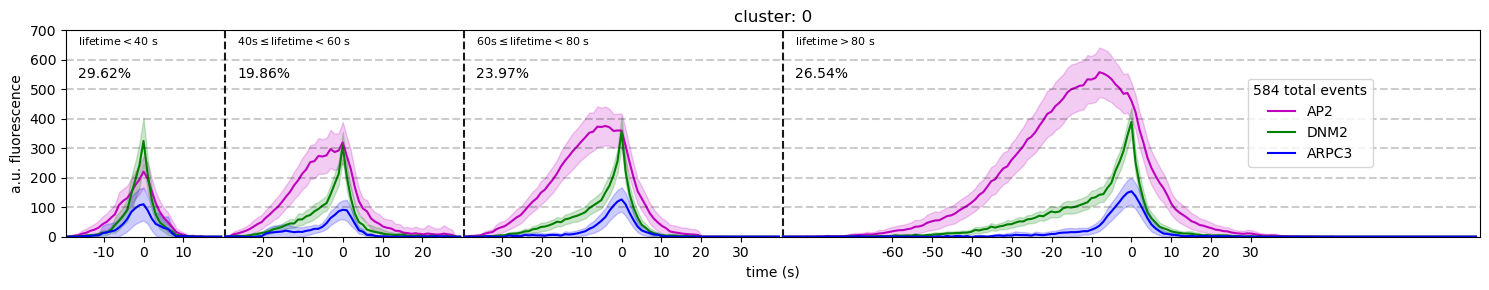

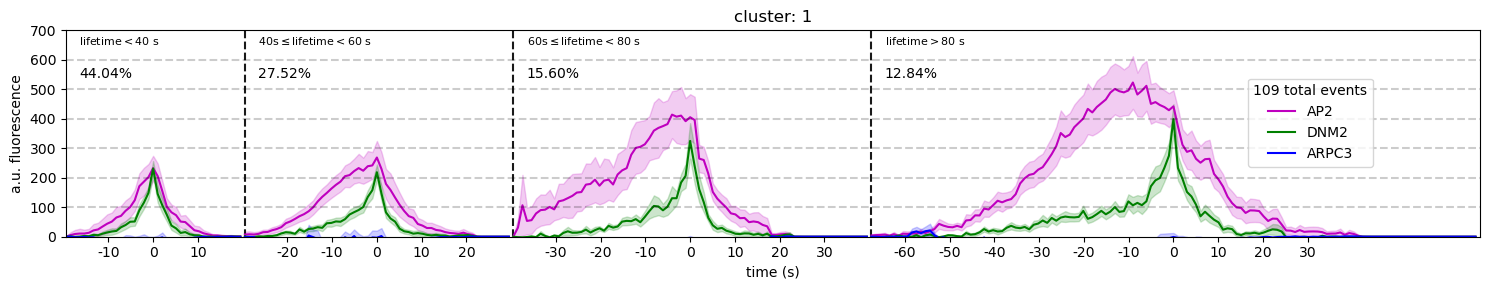

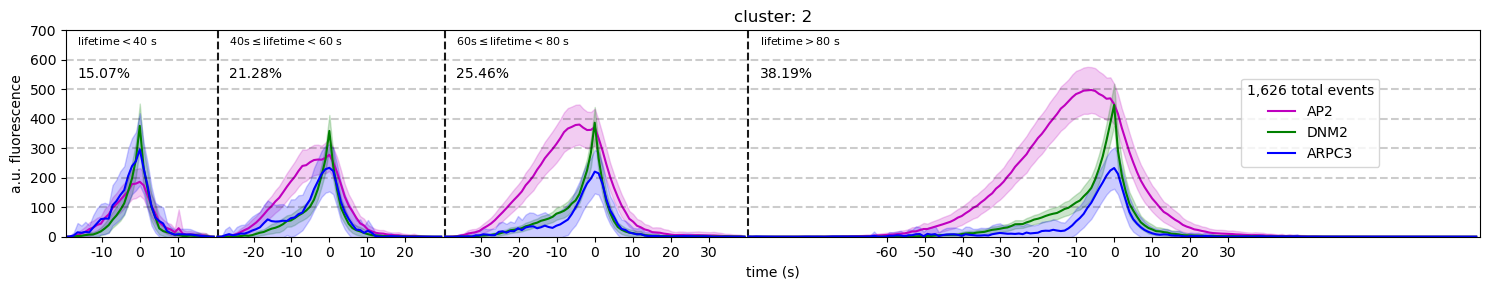

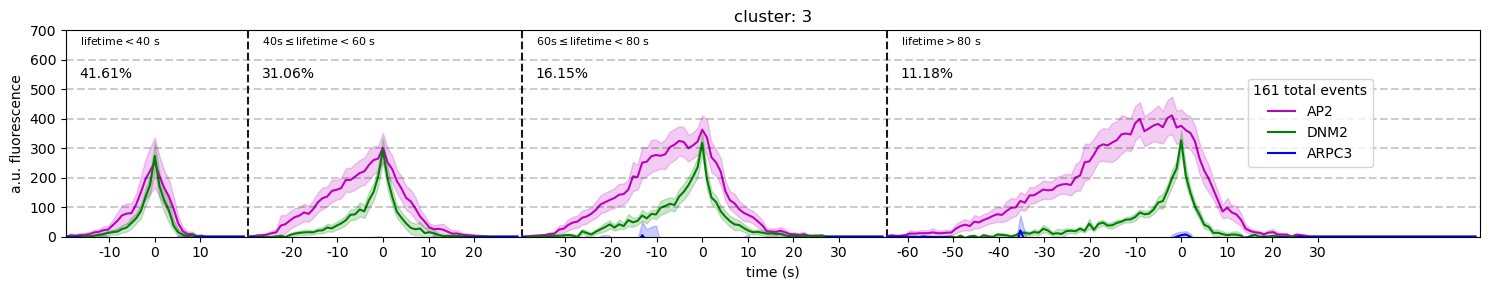

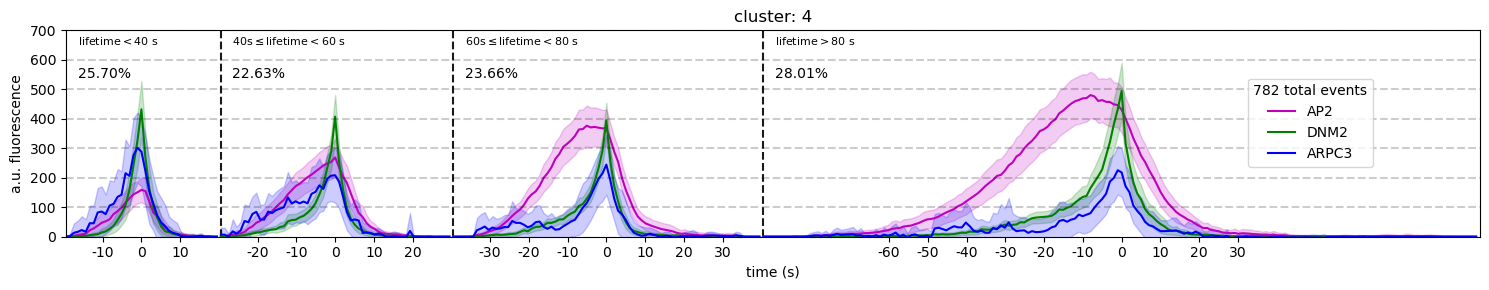

In [35]:
plt.style.use('default')

for pca_cluster in set(np.setdiff1d(labels_pca, -1)):
    
    events_kept_cluster = events_kept[np.where(labels_pca==pca_cluster)[0]]

    fig, axes = plt.subplots(1, 1, dpi=100, figsize=(15,3))
    # axes_separation = axes.twinx()
    
    channel_amplitudes = []
    lifetimes = []
    for track_idx in range(len(events_kept_cluster)):
        current_event = []
        lifetimes.append(len(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 0)))
        current_event.append(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 0))
        current_event.append(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 1))
        current_event.append(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 2))
        channel_amplitudes.append(current_event)
    
    
    cohorts = [[min(lifetimes),40],[40,60],[60,80],[80,max(lifetimes)]]

    offsets, num_in_cohort, max_dnm2_cohort_indices = display_tracks.plot_separated_cohorts([axes], 
                                                                             channel_amplitudes, 
                                                                             1, 
                                                                             cohorts, 
                                                                             [0, 1, 2], 
                                                                             [], 
                                                                             ['AP2', 'DNM2', 'ARPC3'],
                                                                             ['m', 'g', 'b'])

    lines_0, labels_0 = axes.get_legend_handles_labels()
    axes.legend(lines_0, labels_0, 
                loc='upper center', 
                bbox_to_anchor=(0.88, 0.8), 
                title="{:,}".format(len(channel_amplitudes)) + ' total events')

    y_lines = np.arange(0,800,100)

    for i in range(1,len(y_lines)):

        axes.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

    text_horizontal_shifts = 3
    text_percentage_y = 540
    text_bounds_y = 650

    for i in range(len(cohorts)):

        if i==0:
            axes.text(text_horizontal_shifts, text_bounds_y, '$\mathregular{lifetime <}$'+str(cohorts[i][1])+' s', fontsize=8)
            axes.text(text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes)) + '%')
        elif i==len(cohorts)-1:
            axes.text(offsets[i]+text_horizontal_shifts, text_bounds_y, '$\mathregular{lifetime >}$'+str(cohorts[i][0])+' s', fontsize=8)
            axes.text(offsets[i]+text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes)) + '%')
        else:
            axes.text(offsets[i]+text_horizontal_shifts, text_bounds_y, str(cohorts[i][0])+'$\mathregular{s \leq lifetime <}$'+str(cohorts[i][1])+' s', fontsize=8)
            axes.text(offsets[i]+text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes)) + '%')

    x_positions_ticks = []
    x_labels_ticks = []
    max_ticks_per_cohort = [[1, 1], [2, 2], [3, 3], [6, 3]]

    for i in range(len(max_dnm2_cohort_indices)):


        num_ticks_before = np.min((int(np.floor((max_dnm2_cohort_indices[i])/10)),max_ticks_per_cohort[i][0]))
        num_ticks_after = np.min((int(np.ceil((cohorts[i][1]-max_dnm2_cohort_indices[i])/10)-1),max_ticks_per_cohort[i][1]))
        for j in range(num_ticks_before):

            x_labels_ticks.append(-10*(j+1))
            x_positions_ticks.append(-10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])

        x_labels_ticks.append(0)
        x_positions_ticks.append(offsets[i] + max_dnm2_cohort_indices[i])

        for j in range(num_ticks_after):

            x_labels_ticks.append(10*(j+1))
            x_positions_ticks.append(10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])


    axes.set_xticks(0.5+np.array(x_positions_ticks), minor=False)
    axes.set_xticklabels(x_labels_ticks, minor=False)


    axes.set_xlabel('time (s)') 
    axes.set_ylabel('a.u. fluorescence')
    axes.set_title('cluster: '+str(pca_cluster))
    axes.set_xlim([0,offsets[-1]+cohorts[-1][-1]])    
    axes.set_ylim([0,700])  
    plt.tight_layout() 
    plt.show()

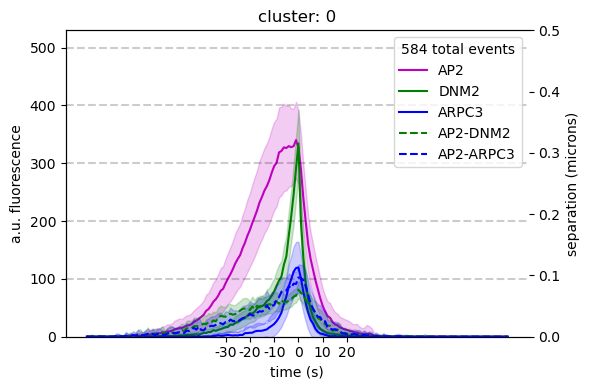

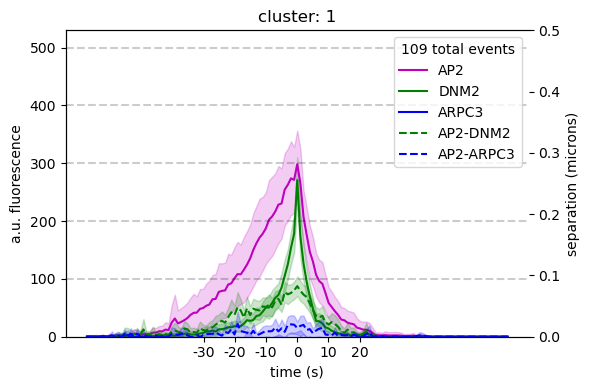

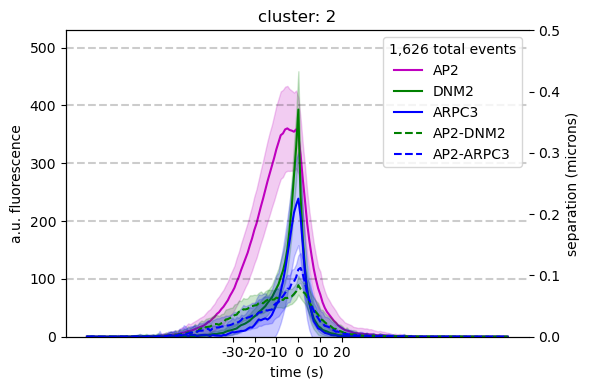

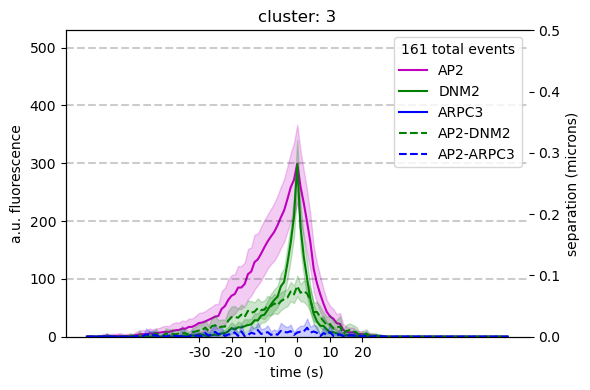

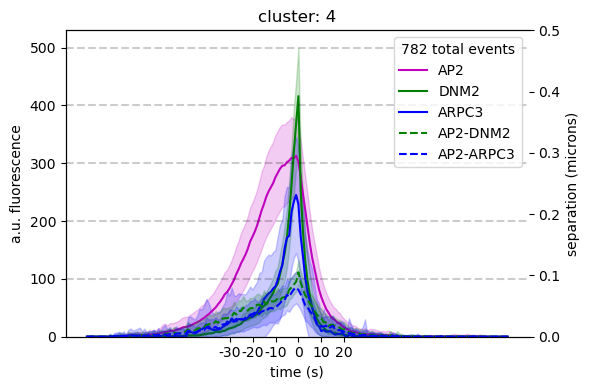

In [36]:
#     np.sqrt((0.108*(ch0_x[channel_0_index]-ch1_x[channel_0_index]))**2 + (0.108*(ch0_y[channel_0_index]-ch1_y[channel_0_index]))**2)) # ap2-dnm2 separation
labels=labels_pca
for cluster_num in set(np.setdiff1d(labels, -1)):
    
    events_kept_cluster = events_kept[np.where(labels==cluster_num)[0]]

    # axes_separation = axes.twinx()
    
    channel_amplitudes = []
    lifetimes = []
    for track_idx in range(len(events_kept_cluster)):
        current_event = []
        lifetimes.append(len(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 0)))
        current_event.append(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 0))
        current_event.append(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 1))
        current_event.append(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 2))
        ch0_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(events_kept_cluster, track_idx, 0) # positions of ap2 and dnm2
        ch0_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(events_kept_cluster, track_idx, 0)
        ch1_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(events_kept_cluster, track_idx, 1)
        ch1_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(events_kept_cluster, track_idx, 1)
        ch2_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(events_kept_cluster, track_idx, 2)
        ch2_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(events_kept_cluster, track_idx, 2)
        current_event.append(np.sqrt((0.108*(ch0_x-ch1_x))**2 + (0.108*(ch0_y-ch1_y))**2))
        current_event.append(np.sqrt((0.108*(ch0_x-ch2_x))**2 + (0.108*(ch0_y-ch2_y))**2))
        
        channel_amplitudes.append(current_event)
  
        
    plt.style.use('default')
    plt.rcParams['axes.spines.right'] = False

    fig, axes = plt.subplots(1, 1, dpi=100, figsize=(6,4))
    axes_separation = axes.twinx()

    cohorts = [[min(lifetimes), max(lifetimes)]]

    offsets, num_in_cohort, max_dnm2_cohort_indices = display_tracks.plot_separated_cohorts([axes, axes_separation], 
                                                                             channel_amplitudes, 
                                                                             1, 
                                                                             cohorts, 
                                                                             [0, 1, 2], 
                                                                             [3, 4], 
                                                                             ['AP2', 'DNM2', 'ARPC3', 'AP2-DNM2', 'AP2-ARPC3'],
                                                                             ['m', 'g', 'b', 'g', 'b'])

    lines_0, labels_0 = axes.get_legend_handles_labels()
    lines_1, labels_1 = axes_separation.get_legend_handles_labels()
    axes.legend(lines_0+lines_1, labels_0+labels_1, 
                loc='upper right',
                title="{:,}".format(len(channel_amplitudes)) + ' total events')
    y_lines = np.arange(0,600,100)

    for i in range(1,len(y_lines)):

        axes.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)


    x_positions_ticks = []
    x_labels_ticks = []
    max_ticks_per_cohort = [[3, 2]]

    for i in range(len(max_dnm2_cohort_indices)):


        num_ticks_before = np.min((int(np.floor((max_dnm2_cohort_indices[i])/10)),max_ticks_per_cohort[i][0]))
        num_ticks_after = np.min((int(np.ceil((cohorts[i][1]-max_dnm2_cohort_indices[i])/10)-1),max_ticks_per_cohort[i][1]))

        for j in range(num_ticks_before):

            x_labels_ticks.append(-10*(j+1))
            x_positions_ticks.append(-10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])

        x_labels_ticks.append(0)
        x_positions_ticks.append(offsets[i] + max_dnm2_cohort_indices[i])

        for j in range(num_ticks_after):

            x_labels_ticks.append(10*(j+1))
            x_positions_ticks.append(10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])


    axes.set_xticks(0.5+np.array(x_positions_ticks), minor=False)
    axes.set_xticklabels(x_labels_ticks, minor=False)


    axes.set_xlabel('time (s)') 
    axes.set_ylabel('a.u. fluorescence')
    axes.set_title('cluster: '+str(cluster_num))
#     axes.set_xlim([50,120])    
    axes.set_ylim([0,530])
    axes_separation.set_ylim([0,0.5])
    axes_separation.set_ylabel('separation (microns)')
#     axes.axvline(120, color='black', linewidth=5, linestyle='--')
    plt.tight_layout()   


# pair-wise distribution comparisons between ap2-arpc3 separation and features

In [37]:
arpc3_positive_clusters = [0, 2, 4]

In [38]:
for pca_cluster in arpc3_positive_clusters:
    print('\n\n\n\n\n\n\ncluster number {}'.format(pca_cluster)+'\n\n\n\n\n\n')
    cluster_indices = np.where(labels_pca==pca_cluster)[0]
    df_cluster = df_arpc3_features_clustering.iloc[cluster_indices]
    x1 = StandardScaler().fit_transform(df_cluster['mean_ap2arpc3sep'].values.reshape(-1,1)).flatten()
    x2 = StandardScaler().fit_transform(df_cluster['ap2arpc3sep_dnm2_peak'].values.reshape(-1,1)).flatten()
    for col in df_cluster.columns:
        print('mean_ap2arpc3sep', col)
        print(pg.corr(x1, StandardScaler().fit_transform(df_cluster[col].values.reshape(-1,1)).flatten(), method="spearman").round(3))
        print('ap2arpc3sep_dnm2_peak', col)
        print(pg.corr(x2, StandardScaler().fit_transform(df_cluster[col].values.reshape(-1,1)).flatten(), method="spearman").round(3))
        








cluster number 0






mean_ap2arpc3sep lifetime
            n     r           CI95%     r2  adj_r2  p-val  power
spearman  584 -0.23  [-0.31, -0.15]  0.053   0.049    0.0    1.0
ap2arpc3sep_dnm2_peak lifetime
            n      r          CI95%   r2  adj_r2  p-val  power
spearman  584 -0.005  [-0.09, 0.08]  0.0  -0.003  0.912  0.051
mean_ap2arpc3sep max_arpc3_intensity
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  584  0.162  [0.08, 0.24]  0.026   0.023    0.0  0.976
ap2arpc3sep_dnm2_peak max_arpc3_intensity
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  584  0.217  [0.14, 0.29]  0.047   0.044    0.0    1.0
mean_ap2arpc3sep max_dnm2_intensity
            n      r          CI95%   r2  adj_r2  p-val  power
spearman  584 -0.007  [-0.09, 0.07]  0.0  -0.003  0.875  0.053
ap2arpc3sep_dnm2_peak max_dnm2_intensity
            n      r          CI95%     r2  adj_r2  p-val  power
spearman  584  0.063  [-0.02, 0.14]  0.004     0.0  0.

An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
divide by zero encountered in arctanh
divide by zero encountered in arctanh
divide by zero encountered in arctanh
divide by zero encountered in arctanh
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.



mean_ap2arpc3sep final_ap2arpc3sep
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  584  0.377  [0.31, 0.44]  0.142   0.139    0.0    1.0
ap2arpc3sep_dnm2_peak final_ap2arpc3sep
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  584  0.256  [0.18, 0.33]  0.066   0.062    0.0    1.0
mean_ap2arpc3sep cluster
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  584 NaN    NaN NaN     NaN    NaN   NaN    NaN
ap2arpc3sep_dnm2_peak cluster
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  584 NaN    NaN NaN     NaN    NaN   NaN    NaN







cluster number 2






mean_ap2arpc3sep lifetime
             n      r           CI95%     r2  adj_r2  p-val  power
spearman  1626 -0.269  [-0.31, -0.22]  0.072   0.071    0.0    1.0
ap2arpc3sep_dnm2_peak lifetime
             n      r           CI95%     r2  adj_r2  p-val  power
spearman  1626 -0.062  [-0.11, -0.01]  0.004   0.003  0.013  0.703
mean_ap2arpc3sep max_arpc3_int

divide by zero encountered in arctanh
divide by zero encountered in arctanh
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.



ap2arpc3sep_dnm2_peak fraction_arpc3_non_PSF
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  782 -0.182  [-0.25, -0.11]  0.033   0.031    0.0  0.999
mean_ap2arpc3sep peak_time_difference_dnm2_arpc3
            n      r          CI95%     r2  adj_r2  p-val  power
spearman  782  0.044  [-0.03, 0.11]  0.002  -0.001  0.221  0.232
ap2arpc3sep_dnm2_peak peak_time_difference_dnm2_arpc3
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  782  0.148  [0.08, 0.22]  0.022   0.019    0.0  0.986
mean_ap2arpc3sep arpc3_psf_status_dnm2_peak
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  782 NaN    NaN NaN     NaN    NaN   NaN    NaN
ap2arpc3sep_dnm2_peak arpc3_psf_status_dnm2_peak
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  782 NaN    NaN NaN     NaN    NaN   NaN    NaN
mean_ap2arpc3sep arpc3_intensity_dnm2_peak
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  782  0.287  [0.22, 0.35

divide by zero encountered in arctanh
divide by zero encountered in arctanh
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.


# compare 2 color (ap2/dnm2) features with ap2-arpc3 sep

In [39]:
features_arpc3_and_featureextraction = np.concatenate((df_arpc3_features_clustering.values, df_merged_features_simultaneous3colortrackingarpc3.values[dnm2_pos_indices[ccp_indices]][:,:-1]), axis=1)

In [40]:
df_features_arpc3_and_featureextraction = pd.DataFrame(data=features_arpc3_and_featureextraction, 
                                                       columns=column_labels+list(possible_track_features))

In [41]:
df_features_arpc3_and_featureextraction.corr(method='spearman')['ap2arpc3sep_dnm2_peak']

lifetime                             0.067474
max_arpc3_intensity                  0.192632
max_dnm2_intensity                   0.189203
max_ap2_intensity                    0.001840
number_arpc3_significant             0.424382
max_consecutive_arpc3_significant    0.432548
fraction_arpc3_significant           0.441178
fraction_arpc3_peak                  0.146408
fraction_dnm2_peak                   0.047803
num_arpc3_PSF                        0.183400
max_consecutive_arpc3_PSF            0.187376
fraction_arpc3_PSF                   0.202405
num_arpc3_non_PSF                   -0.167684
max_consecutive_arpc3_non_PSF       -0.179823
fraction_arpc3_non_PSF              -0.218978
peak_time_difference_dnm2_arpc3      0.135255
arpc3_psf_status_dnm2_peak           0.284819
arpc3_intensity_dnm2_peak            0.609278
mean_ap2arpc3sep                     0.426670
ap2arpc3sep_dnm2_peak                1.000000
final_ap2arpc3sep                    0.293214
lifetime                          

In [42]:
df_features_arpc3_and_featureextraction.corr(method='spearman')['mean_ap2arpc3sep']

lifetime                            -0.152838
max_arpc3_intensity                  0.300992
max_dnm2_intensity                   0.094429
max_ap2_intensity                   -0.186625
number_arpc3_significant             0.619888
max_consecutive_arpc3_significant    0.535671
fraction_arpc3_significant           0.794192
fraction_arpc3_peak                 -0.045894
fraction_dnm2_peak                  -0.031524
num_arpc3_PSF                        0.063538
max_consecutive_arpc3_PSF            0.082136
fraction_arpc3_PSF                   0.221646
num_arpc3_non_PSF                   -0.315645
max_consecutive_arpc3_non_PSF       -0.324993
fraction_arpc3_non_PSF              -0.290175
peak_time_difference_dnm2_arpc3      0.011047
arpc3_psf_status_dnm2_peak           0.166352
arpc3_intensity_dnm2_peak            0.372584
mean_ap2arpc3sep                     1.000000
ap2arpc3sep_dnm2_peak                0.426670
final_ap2arpc3sep                    0.403886
lifetime                          

In [43]:
df_features_arpc3_and_featureextraction.corr(method='spearman')['final_ap2arpc3sep']

lifetime                            -0.047398
max_arpc3_intensity                  0.109761
max_dnm2_intensity                   0.087054
max_ap2_intensity                   -0.057099
number_arpc3_significant             0.252998
max_consecutive_arpc3_significant    0.240342
fraction_arpc3_significant           0.334823
fraction_arpc3_peak                  0.280889
fraction_dnm2_peak                   0.139941
num_arpc3_PSF                        0.071372
max_consecutive_arpc3_PSF            0.081648
fraction_arpc3_PSF                   0.172435
num_arpc3_non_PSF                   -0.217325
max_consecutive_arpc3_non_PSF       -0.211361
fraction_arpc3_non_PSF              -0.211236
peak_time_difference_dnm2_arpc3      0.216080
arpc3_psf_status_dnm2_peak           0.148520
arpc3_intensity_dnm2_peak            0.236909
mean_ap2arpc3sep                     0.403886
ap2arpc3sep_dnm2_peak                0.293214
final_ap2arpc3sep                    1.000000
lifetime                          

In [44]:
for pca_cluster in arpc3_positive_clusters:
    print('\n\n\n\n\n\n\ncluster number {}'.format(pca_cluster)+'\n\n\n\n\n\n')
    cluster_indices = np.where(labels_pca==pca_cluster)[0]
    df_cluster = df_features_arpc3_and_featureextraction.iloc[cluster_indices]
    x1 = StandardScaler().fit_transform(df_cluster['mean_ap2arpc3sep'].values.reshape(-1,1)).flatten()
    x2 = StandardScaler().fit_transform(df_cluster['ap2arpc3sep_dnm2_peak'].values.reshape(-1,1)).flatten()
#     print(len(x1))
#     b
    
    for i in range(df_cluster.values.shape[1]):
        print('mean_ap2arpc3sep', col)
#         print(len(StandardScaler().fit_transform(df_cluster[col].values.reshape(-1,1)).flatten()))
        print(pg.corr(x1, StandardScaler().fit_transform(df_cluster.values[:,i].reshape(-1,1)).flatten(), method="spearman").round(3))
        print('ap2arpc3sep_dnm2_peak', col)
        print(pg.corr(x2, StandardScaler().fit_transform(df_cluster.values[:,i].reshape(-1,1)).flatten(), method="spearman").round(3))








cluster number 0






mean_ap2arpc3sep cluster
            n     r           CI95%     r2  adj_r2  p-val  power
spearman  584 -0.23  [-0.31, -0.15]  0.053   0.049    0.0    1.0
ap2arpc3sep_dnm2_peak cluster
            n      r          CI95%   r2  adj_r2  p-val  power
spearman  584 -0.005  [-0.09, 0.08]  0.0  -0.003  0.912  0.051
mean_ap2arpc3sep cluster
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  584  0.162  [0.08, 0.24]  0.026   0.023    0.0  0.976
ap2arpc3sep_dnm2_peak cluster
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  584  0.217  [0.14, 0.29]  0.047   0.044    0.0    1.0
mean_ap2arpc3sep cluster
            n      r          CI95%   r2  adj_r2  p-val  power
spearman  584 -0.007  [-0.09, 0.07]  0.0  -0.003  0.875  0.053
ap2arpc3sep_dnm2_peak cluster
            n      r          CI95%     r2  adj_r2  p-val  power
spearman  584  0.063  [-0.02, 0.14]  0.004     0.0  0.131  0.327
mean_ap2arpc3sep cluster
            

An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
divide by zero encountered in arctanh
divide by zero encountered in arctanh
divide by zero encountered in arctanh
divide by zero encountered in arctanh
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.



ap2arpc3sep_dnm2_peak cluster
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  584  0.256  [0.18, 0.33]  0.066   0.062    0.0    1.0
mean_ap2arpc3sep cluster
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  584 NaN    NaN NaN     NaN    NaN   NaN    NaN
ap2arpc3sep_dnm2_peak cluster
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  584 NaN    NaN NaN     NaN    NaN   NaN    NaN
mean_ap2arpc3sep cluster
            n     r           CI95%     r2  adj_r2  p-val  power
spearman  584 -0.23  [-0.31, -0.15]  0.053   0.049    0.0    1.0
ap2arpc3sep_dnm2_peak cluster
            n      r          CI95%   r2  adj_r2  p-val  power
spearman  584 -0.005  [-0.09, 0.08]  0.0  -0.003  0.912  0.051
mean_ap2arpc3sep cluster
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  584 -0.243  [-0.32, -0.17]  0.059   0.056    0.0    1.0
ap2arpc3sep_dnm2_peak cluster
            n      r         CI95%     r2  adj_r2  p-val  po

divide by zero encountered in arctanh
divide by zero encountered in arctanh
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.



ap2arpc3sep_dnm2_peak cluster
             n      r          CI95%   r2  adj_r2  p-val  power
spearman  1626 -0.021  [-0.07, 0.03]  0.0  -0.001   0.39  0.138
mean_ap2arpc3sep cluster
             n      r           CI95%     r2  adj_r2  p-val  power
spearman  1626 -0.108  [-0.16, -0.06]  0.012    0.01    0.0  0.992
ap2arpc3sep_dnm2_peak cluster
             n      r          CI95%   r2  adj_r2  p-val  power
spearman  1626 -0.005  [-0.05, 0.04]  0.0  -0.001  0.838  0.055
mean_ap2arpc3sep cluster
             n      r          CI95%   r2  adj_r2  p-val  power
spearman  1626  0.018  [-0.03, 0.07]  0.0  -0.001  0.456  0.116
ap2arpc3sep_dnm2_peak cluster
             n      r          CI95%   r2  adj_r2  p-val  power
spearman  1626  0.014  [-0.03, 0.06]  0.0  -0.001   0.57  0.088
mean_ap2arpc3sep cluster
             n      r       CI95%     r2  adj_r2  p-val  power
spearman  1626  0.152  [0.1, 0.2]  0.023   0.022    0.0    1.0
ap2arpc3sep_dnm2_peak cluster
             n      r          C

An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
divide by zero encountered in arctanh
divide by zero encountered in arctanh
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.


            n     r          CI95%     r2  adj_r2  p-val  power
spearman  782  0.05  [-0.02, 0.12]  0.002    -0.0  0.166  0.283
mean_ap2arpc3sep cluster
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  782 -0.205  [-0.27, -0.14]  0.042    0.04    0.0    1.0
ap2arpc3sep_dnm2_peak cluster
            n      r          CI95%     r2  adj_r2  p-val  power
spearman  782  0.039  [-0.03, 0.11]  0.001  -0.001  0.282  0.189
mean_ap2arpc3sep cluster
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  782 -0.221  [-0.29, -0.15]  0.049   0.046    0.0    1.0
ap2arpc3sep_dnm2_peak cluster
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  782 -0.027  [-0.1, 0.04]  0.001  -0.002  0.445  0.119
mean_ap2arpc3sep cluster
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  782  0.029  [-0.04, 0.1]  0.001  -0.002  0.413   0.13
ap2arpc3sep_dnm2_peak cluster
            n      r           CI95%     r2  adj_r2  p-va

# apply standard scaler (doesn't seem to matter)

# comparing all events_kept in clusters 1 4 5

In [45]:
events_kept_features = df_merged_features_simultaneous3colortrackingarpc3.values[np.nonzero(gmm_predictions_new_data==index_DNM2positive)[0][np.where(np.array(current_param_outputs)==1)[0]]]

In [46]:
values_df_sep_extracted_features = np.concatenate((events_kept_features, df_arpc3_features_clustering['mean_ap2arpc3sep'].values.reshape(-1,1), df_arpc3_features_clustering['ap2arpc3sep_dnm2_peak'].values.reshape(-1,1)), axis=1)

In [47]:
df_values_df_sep_extracted_features = pd.DataFrame(data=values_df_sep_extracted_features, columns=list(possible_track_features)+['mean_sep', 'sep_peak'])

In [48]:
cluster_indices = np.where((labels_pca==1) | (labels_pca==4) | (labels_pca==5))[0]
#     print(cluster_indices)
values_df_cluster = StandardScaler().fit_transform(df_values_df_sep_extracted_features.iloc[cluster_indices].values)
df_scaled = pd.DataFrame(data=values_df_cluster, columns=list(possible_track_features)+['mean_sep', 'sep_peak'])

print(pg.pairwise_corr(df_scaled, method='spearman', tail='two-sided', columns=[["mean_sep", "sep_peak"], None]).round(3))

           X                                Y    method       tail    n  \
0   mean_sep                         lifetime  spearman  two-sided  891   
1   mean_sep                      max_int_ch0  spearman  two-sided  891   
2   mean_sep                      max_int_ch1  spearman  two-sided  891   
3   mean_sep                dist_traveled_ch0  spearman  two-sided  891   
4   mean_sep                dist_traveled_ch1  spearman  two-sided  891   
..       ...                              ...       ...        ...  ...   
59  sep_peak           number_significant_ch1  spearman  two-sided  891   
60  sep_peak  max_consecutive_significant_ch1  spearman  two-sided  891   
61  sep_peak         fraction_significant_ch1  spearman  two-sided  891   
62  sep_peak                fraction_peak_ch0  spearman  two-sided  891   
63  sep_peak                fraction_peak_ch1  spearman  two-sided  891   

        r           CI95%     r2  adj_r2      z  p-unc  power  
0  -0.189  [-0.25, -0.12]  0.036   

# comparing all events_kept, not split into pca clusters

In [49]:
values_df_cluster = StandardScaler().fit_transform(df_values_df_sep_extracted_features.values)
df_scaled = pd.DataFrame(data=values_df_cluster, columns=list(possible_track_features)+['mean_sep', 'sep_peak'])

print(pg.pairwise_corr(df_scaled, method='spearman', tail='two-sided', columns=[["mean_sep", "sep_peak"], None]).round(3))

           X                                Y    method       tail     n  \
0   mean_sep                         lifetime  spearman  two-sided  3293   
1   mean_sep                      max_int_ch0  spearman  two-sided  3293   
2   mean_sep                      max_int_ch1  spearman  two-sided  3293   
3   mean_sep                dist_traveled_ch0  spearman  two-sided  3293   
4   mean_sep                dist_traveled_ch1  spearman  two-sided  3293   
..       ...                              ...       ...        ...   ...   
59  sep_peak           number_significant_ch1  spearman  two-sided  3293   
60  sep_peak  max_consecutive_significant_ch1  spearman  two-sided  3293   
61  sep_peak         fraction_significant_ch1  spearman  two-sided  3293   
62  sep_peak                fraction_peak_ch0  spearman  two-sided  3293   
63  sep_peak                fraction_peak_ch1  spearman  two-sided  3293   

        r           CI95%     r2  adj_r2      z  p-unc  power  
0  -0.153  [-0.19, -0.1

# look at all DNM2+ events

In [50]:
df_dnm2_pos_features = extracted_features_all_tracks_3_color[np.nonzero(gmm_predictions_new_data==index_DNM2positive)[0]]

dnm2pos_meanap2arpc3sep = []
dnm2pos_ap2arpc3sepdnm2peak = []
dnm2pos_events = np.array(list(merged_all_valid_tracks))[np.nonzero(gmm_predictions_new_data==index_DNM2positive)[0]]

for i in range(len(dnm2pos_events)):

    ch0_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(dnm2pos_events, i, 0) # positions of ap2 and dnm2
    ch0_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(dnm2pos_events, i, 0)
    ch1_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(dnm2pos_events, i, 1)
    ch1_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(dnm2pos_events, i, 1)
    ch2_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(dnm2pos_events, i, 2)
    ch2_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(dnm2pos_events, i, 2)
    ap2dnm2sep = np.sqrt((0.108*(ch0_x-ch1_x))**2 + (0.108*(ch0_y-ch1_y))**2)
    ap2arpc3sep = np.sqrt((0.108*(ch0_x-ch2_x))**2 + (0.108*(ch0_y-ch2_y))**2)

    dnm2pos_meanap2arpc3sep.append(np.nanmean(ap2arpc3sep))
    dnm2pos_ap2arpc3sepdnm2peak.append(ap2arpc3sep[np.nanargmax(return_track_attributes.return_track_amplitude_no_buffer_channel(dnm2pos_events, i, 1))])
    
    

df_dnm2_pos_features = np.concatenate((df_dnm2_pos_features, np.array(dnm2pos_meanap2arpc3sep).reshape(-1,1), np.array(dnm2pos_ap2arpc3sepdnm2peak).reshape(-1,1)), axis=1)
df_dnm2_pos_features = pd.DataFrame(data=df_dnm2_pos_features, columns=list(possible_track_features)+['mean_sep', 'sep_peak'])

values_df_cluster = StandardScaler().fit_transform(df_dnm2_pos_features.values)
df_scaled = pd.DataFrame(data=values_df_cluster, columns=list(possible_track_features)+['mean_sep', 'sep_peak'])

print(pg.pairwise_corr(df_scaled, method='spearman', tail='two-sided', columns=[["mean_sep", "sep_peak"], None]).round(3))


           X                                Y    method       tail     n  \
0   mean_sep                         lifetime  spearman  two-sided  7839   
1   mean_sep                      max_int_ch0  spearman  two-sided  7839   
2   mean_sep                      max_int_ch1  spearman  two-sided  7839   
3   mean_sep                dist_traveled_ch0  spearman  two-sided  7839   
4   mean_sep                dist_traveled_ch1  spearman  two-sided  7839   
..       ...                              ...       ...        ...   ...   
59  sep_peak           number_significant_ch1  spearman  two-sided  7839   
60  sep_peak  max_consecutive_significant_ch1  spearman  two-sided  7839   
61  sep_peak         fraction_significant_ch1  spearman  two-sided  7839   
62  sep_peak                fraction_peak_ch0  spearman  two-sided  7839   
63  sep_peak                fraction_peak_ch1  spearman  two-sided  7839   

        r           CI95%     r2  adj_r2      z  p-unc  power  
0  -0.179   [-0.2, -0.1

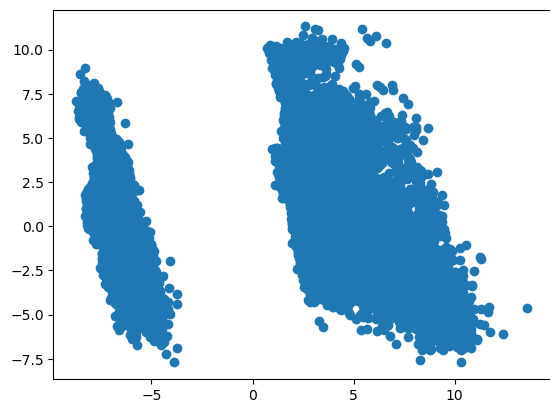

In [51]:
plt.scatter(pcs_new_data[:,0], pcs_new_data[:,1])

In [52]:
plt.scatter(pcs_new_data[:,0][np.nonzero(gmm_predictions_new_data==index_DNM2positive)[0][np.where(np.array(current_param_outputs)==1)[0]]], 
            pcs_new_data[:,1][np.nonzero(gmm_predictions_new_data==index_DNM2positive)[0][np.where(np.array(current_param_outputs)==1)[0]]],
            c=labels_pca,
            alpha=0.2)
